# Business Visual Overtime by Investments

In [ ]:
df_1 = _deepnote_execute_sql('SELECT * from \'/work/investmentQuality.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,column0,column1,column2
0,Name,2002-2012,2012-2022
1,35th/Halsted,High,High
2,41st/King,Medium,Medium
3,43rd/Damen,Low,Low
4,49th Street/St. Lawrence Avenue,Medium,High
...,...,...,...
182,116th/Avenue O,Low,High
183,Cortland/Chicago River,Low,High
184,Roosevelt/Clark,Low,High
185,Cicero/Stevenson,Low,Low


In [ ]:

dictChange = {
"105th Street and Vincennes Avenue" : "105th/Vincennes",
"119th Street/I-57" : "119th/I-57",

"26th & King Drive" : "26th and King Drive",
"43rd Street/Cottage Grove Avenue" : "43rd/Cottage Grove",
"47th and King Drive" : "47th/King Drive",
"51st and Lake Park" : "51st/Lake Park",
"67th and Wentworth" : "67th/Wentworth",
"71st & Stony Island" : "71st/Stony Island",
"95th & Western" : "95th and Western",
"Cortland and Chicago River" : "Cortland/Chicago River",
"Englewood Mall Area" : "Englewood Mall",
"Foster and California" : "Foster/California",
"Greater Southwest Industrial (East)" : "Greater Southwest Industrial Corridor (East)",
"Greater Southwest Industrial (West)" : "Greater Southwest Industrial Corridor (West)",
"Kinzie Industrial Conservation Area" : "Kinzie Industrial Corridor",
"Pilsen" : "Pilsen Industrial Corridor",
"Red Line Extension (RLE)" : "Red Line Extension",
"Red and Purple Modernization Phase One Project" : "Red Purple Modernization Phase One (Transit TIF)",
"Roseland/Michigan Avenue" : "Roseland/Michigan"

}


flipped_dict = {value: key for key, value in dictChange.items()}

print(flipped_dict)

{'105th/Vincennes': '105th Street and Vincennes Avenue', '119th/I-57': '119th Street/I-57', '26th and King Drive': '26th & King Drive', '43rd/Cottage Grove': '43rd Street/Cottage Grove Avenue', '47th/King Drive': '47th and King Drive', '51st/Lake Park': '51st and Lake Park', '67th/Wentworth': '67th and Wentworth', '71st/Stony Island': '71st & Stony Island', '95th and Western': '95th & Western', 'Cortland/Chicago River': 'Cortland and Chicago River', 'Englewood Mall': 'Englewood Mall Area', 'Foster/California': 'Foster and California', 'Greater Southwest Industrial Corridor (East)': 'Greater Southwest Industrial (East)', 'Greater Southwest Industrial Corridor (West)': 'Greater Southwest Industrial (West)', 'Kinzie Industrial Corridor': 'Kinzie Industrial Conservation Area', 'Pilsen Industrial Corridor': 'Pilsen', 'Red Line Extension': 'Red Line Extension (RLE)', 'Red Purple Modernization Phase One (Transit TIF)': 'Red and Purple Modernization Phase One Project', 'Roseland/Michigan': 'Ro

In [ ]:
for index, row in df_1.iterrows():
    if row["column0"] in flipped_dict.keys():
        df_1.at[index, "column0"] = flipped_dict[row["column0"]]  
        

In [ ]:
df_2 = _deepnote_execute_sql('SELECT *\nFROM df_1\nORDER BY column0 ASC;\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,column0,column1,column2
0,105th Street and Vincennes Avenue,Medium,High
1,107th/Halsted,Low,Medium
2,111th Street/Kedzie Avenue Business District,Medium,High
3,116th/Avenue O,Low,High
4,119th Street/I-57,High,High
...,...,...,...
182,Western Avenue South,High,High
183,Western Avenue/Rock Island,Medium,High
184,Western/Ogden,High,High
185,Wilson Yard,High,High


In [ ]:
df_3 = _deepnote_execute_sql('SELECT LEGAL_NAME,SUBSTRING(TIF_Name, 3, LENGTH(TIF_Name) - 4) as TIF_Name, LICENSE_TERM_START_DATE, LICENSE_TERM_EXPIRATION_DATE\nFROM \'BusWithCom.csv\'\nWHERE LENGTH(TIF_Name) != 2\n-- GROUP BY LEGAL_NAME, TIF_Name\n-- SUBSTRING(Com_Name, 3, LENGTH(Com_Name) - 4)', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,LEGAL_NAME,TIF_Name,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE
0,LEOPARDO COMPANIES INC.,Kinzie Industrial Conservation Area,2020-09-16,2022-09-15
1,"1021 MONTROSE, L.L.C.",Wilson Yard,2022-06-16,2024-06-15
2,DOMONANT MEDIA LLC,35th/Halsted,2022-08-08,2024-08-15
3,"CHICAGO CUBS BASEBALL CLUB, LLC",Red and Purple Modernization Phase One Project,2020-06-16,2022-06-15
4,GRAHAM ENTERPRISE INC,Red and Purple Modernization Phase One Project,2022-06-16,2023-06-15
...,...,...,...,...
503052,HO CHUL SHIN,Lawrence/Kedzie,2002-11-16,2003-11-15
503053,"JH ELECTRONICS, INC.",Fullerton/Milwaukee,2009-11-16,2011-11-15
503054,SHOBHNA INC.,Lawrence/Kedzie,2021-03-16,2022-03-15
503055,TERRANCE J. WATTS,105th Street and Vincennes Avenue,2007-01-24,2009-02-15


In [ ]:
df_4 = _deepnote_execute_sql('SELECT df_3.LEGAL_NAME, df_3.TIF_Name, df_3.LICENSE_TERM_START_DATE, df_3.LICENSE_TERM_EXPIRATION_DATE, df_1.column2\nFROM df_3\nINNER JOIN df_1 ON df_3.TIF_Name = df_1.column0;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_4

,LEGAL_NAME,TIF_Name,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,column2
0,LEOPARDO COMPANIES INC.,Kinzie Industrial Conservation Area,2020-09-16,2022-09-15,High
1,"1021 MONTROSE, L.L.C.",Wilson Yard,2022-06-16,2024-06-15,High
2,DOMONANT MEDIA LLC,35th/Halsted,2022-08-08,2024-08-15,High
3,PRIMERA IRON WORKS CORP.,Northwest Industrial Corridor,2022-09-16,2024-09-15,High
4,THE BUTLER DID IT INC.,Kinzie Industrial Conservation Area,2022-09-16,2024-09-15,High
...,...,...,...,...,...
502971,"CHICAGO RUNNING & SPECIAL EVENTS MANAGEMENT, INC.",Red and Purple Modernization Phase One Project,2012-07-05,2012-07-08,High
502972,AAA TICKETS INC,Red and Purple Modernization Phase One Project,2011-04-16,2013-04-15,High
502973,GOLD STANDARD ENTERPRISES INC.,Red and Purple Modernization Phase One Project,2003-05-16,2003-11-15,High
502974,LEITELT BROTHERS,71st & Stony Island,2010-10-16,2012-10-15,High


In [ ]:
high_df = _deepnote_execute_sql('SELECT *\nFROM df_4\nWHERE column2 = \'High\';', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
high_df

,LEGAL_NAME,TIF_Name,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,column2
0,LEOPARDO COMPANIES INC.,Kinzie Industrial Conservation Area,2020-09-16,2022-09-15,High
1,"1021 MONTROSE, L.L.C.",Wilson Yard,2022-06-16,2024-06-15,High
2,DOMONANT MEDIA LLC,35th/Halsted,2022-08-08,2024-08-15,High
3,PRIMERA IRON WORKS CORP.,Northwest Industrial Corridor,2022-09-16,2024-09-15,High
4,THE BUTLER DID IT INC.,Kinzie Industrial Conservation Area,2022-09-16,2024-09-15,High
...,...,...,...,...,...
413286,"CHICAGO RUNNING & SPECIAL EVENTS MANAGEMENT, INC.",Red and Purple Modernization Phase One Project,2012-07-05,2012-07-08,High
413287,AAA TICKETS INC,Red and Purple Modernization Phase One Project,2011-04-16,2013-04-15,High
413288,GOLD STANDARD ENTERPRISES INC.,Red and Purple Modernization Phase One Project,2003-05-16,2003-11-15,High
413289,LEITELT BROTHERS,71st & Stony Island,2010-10-16,2012-10-15,High


In [ ]:
med_df = _deepnote_execute_sql('SELECT *\nFROM df_4\nWHERE column2 = \'Medium\';', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
med_df

,LEGAL_NAME,TIF_Name,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,column2
0,ELVIRA TECALERO DEGANTE,Armitage/Pulaski,2019-09-13,2021-09-15,Medium
1,"3938 AVONDALE, LLC",Avondale,2021-12-16,2023-12-15,Medium
2,"3938 AVONDALE, LLC",Avondale,2021-12-16,2023-12-15,Medium
3,ELVIRA TECALERO DEGANTE,Armitage/Pulaski,2021-09-16,2023-09-15,Medium
4,"CHARLES GIPSON INVESTMENT & REAL ESTATE, LLC",79th Street/Southwest Highway,2022-01-16,2024-01-15,Medium
...,...,...,...,...,...
47259,LOUIS RODRIGUEZ,63rd/Pulaski,2005-11-16,2006-11-15,Medium
47260,MERCY HOSPITAL AND MEDICAL CENTER,63rd/Pulaski,2018-06-16,2020-10-15,Medium
47261,ANDREW'S SUPER AUTO REPAIR INC.,63rd/Pulaski,2009-10-16,2011-10-15,Medium
47262,BRUDDER'S BAR & GRILL LLC,Avondale,2007-08-16,2009-08-15,Medium


In [ ]:
low_df = _deepnote_execute_sql('SELECT *\nFROM df_4\nWHERE column2 = \'Low\';', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
low_df

,LEGAL_NAME,TIF_Name,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,column2
0,"COMPASS GROUP USA, INC.",Red Line Extension (RLE),2022-05-11,2023-04-15,Low
1,WON BOK SEO,Red Line Extension (RLE),2022-05-16,2024-05-15,Low
2,MICRO HOSPITALITY LLC,Red Line Extension (RLE),2021-05-16,2023-05-15,Low
3,"VIP NAILS & SPA CHICAGO, INC.",Red Line Extension (RLE),2022-08-16,2024-08-15,Low
4,"SIXT RENT A CAR, LLC",Red Line Extension (RLE),2021-12-16,2023-12-15,Low
...,...,...,...,...,...
42416,"CONGRESS PLAZA HOTEL, LLC",Red Line Extension (RLE),2003-11-16,2004-11-15,Low
42417,"LOS DOS LAREDOS RESTAURANT, INC.",Red Line Extension (RLE),2008-06-05,2008-06-08,Low
42418,PEI-YI MUI,Red Line Extension (RLE),2002-10-10,2003-08-15,Low
42419,H&R BLOCK ENTERPRISES LLC,Red Line Extension (RLE),2007-05-16,2008-03-15,Low


In [ ]:
community_businesses = _deepnote_execute_sql('SELECT LEGAL_NAME, Com_Name, LICENSE_TERM_EXPIRATION_DATE, LICENSE_TERM_START_DATE\nFROM \'/work/BusWithCom.csv\'\nWHERE Com_Name != \'[]\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
community_businesses

,LEGAL_NAME,Com_Name,LICENSE_TERM_EXPIRATION_DATE,LICENSE_TERM_START_DATE
0,TTX COMPANY,['NEW CITY'],2024-09-15,2022-09-16
1,JYM INVESTMENTS LLC,['WEST RIDGE'],2023-01-15,2020-12-17
2,GRAHAM ENTERPRISE INC,['NEAR NORTH SIDE'],2024-06-15,2022-06-16
3,"MEHRAB MANAGEMENT, INC.",['WEST RIDGE'],2024-05-15,2022-05-16
4,ELIAS A. KANELLOPOULOS,['NEAR NORTH SIDE'],2011-03-15,2009-03-16
...,...,...,...,...
529564,AZCON INC.,['NEAR WEST SIDE'],2021-12-15,2019-12-16
529565,"GUARANTEED MEDICAL SERVICE, INC.",['GARFIELD RIDGE'],2017-02-15,2015-02-16
529566,EL HOGAR DEL NINO,['SOUTH LAWNDALE'],2004-02-15,2003-02-16
529567,"AABALL HEATING SERVICE & SUPPLIES, INC.",['AUBURN GRESHAM'],2018-07-15,2016-07-16


NOW MAKE SO THAT WE HAVE THE PERCENT CHANGE OVER THE YEARS FOR  HIGH, MED, LOW LIKE WHAT WE DID FOR THE OTHER BAR GRAPHS

### Now lets visualize the changes in these TIFs and 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

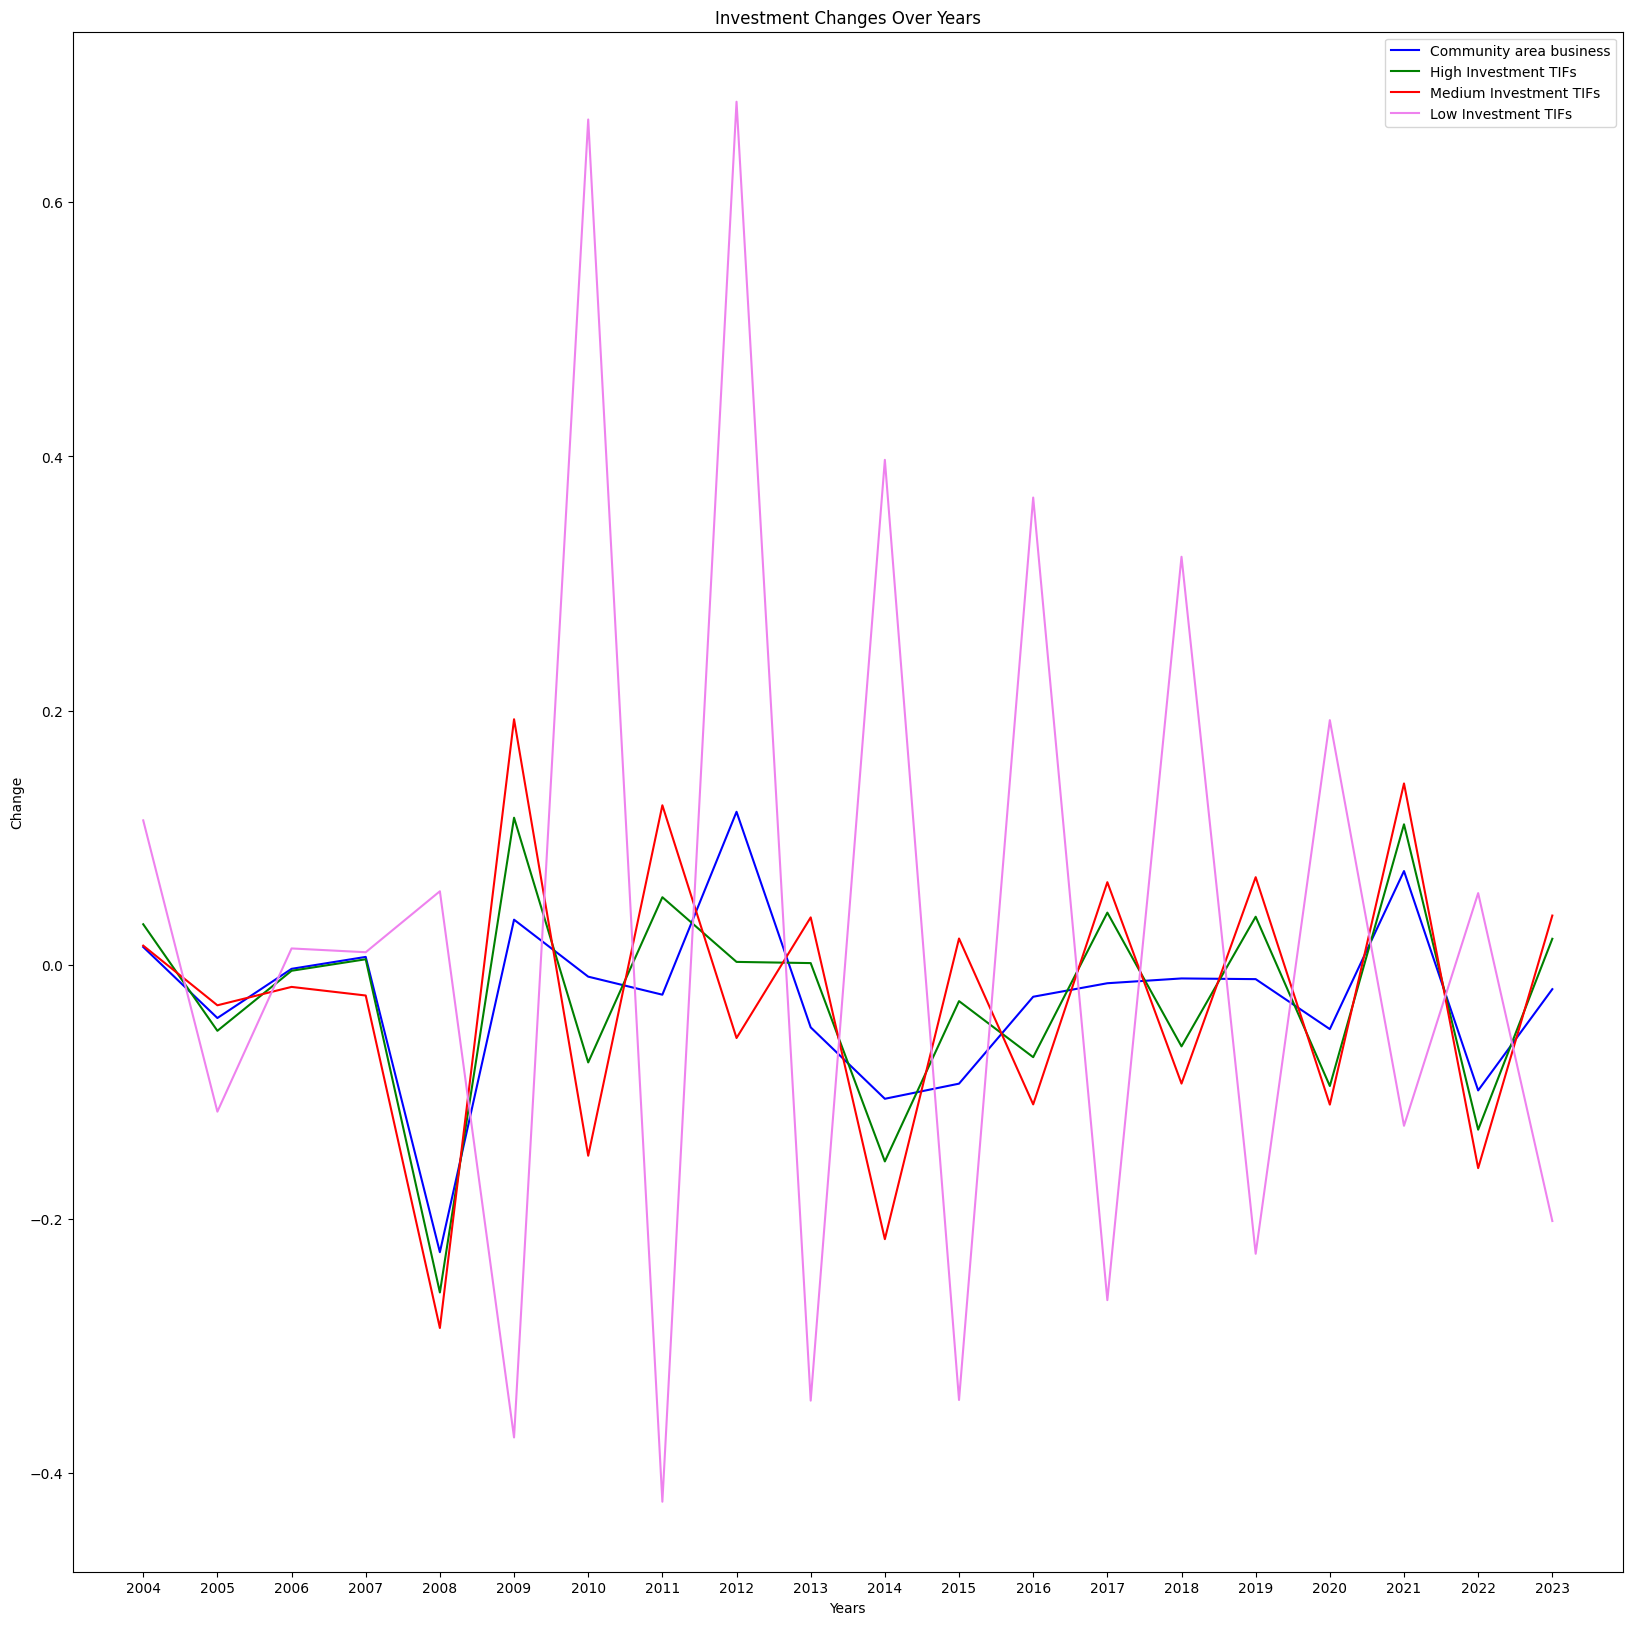

In [ ]:
# all_businesses = pd.concat([low_df, med_df, high_df, community_businesses], ignore_index=True)
# lowest_year = all_businesses['LICENSE_TERM_START_DATE'].dt.year.min()

years = range(2003, 2024)

def get_active_businesses_by_year(business_df):
    business_counts = []
    for year in years:
        business_counts.append(((business_df['LICENSE_TERM_START_DATE'].dt.year <= year) & (business_df['LICENSE_TERM_EXPIRATION_DATE'].dt.year >= year)).sum())
    
    return business_counts

# get the percent change in businesses by index, the returned array will have len = len(initial)-1 because we cant calculate change for the first year
def get_percent_of_businesses_changed(business_counts):
    businesses_change = []

    for index in range(1, len(business_counts)):
        businesses_change.append((business_counts[index] - business_counts[index-1]) / business_counts[index-1])
        
    return businesses_change

community_investment_change = get_percent_of_businesses_changed(get_active_businesses_by_year(community_businesses))
high_investment_change = get_percent_of_businesses_changed(get_active_businesses_by_year(high_df))
medium_investment_change = get_percent_of_businesses_changed(get_active_businesses_by_year(med_df))
low_investment_change = get_percent_of_businesses_changed(get_active_businesses_by_year(low_df))

years = range(2004, 2024)
years = [str(year) for year in years]


fig, ax = plt.subplots(figsize=(20, 20))

# Plotting the data
ax.plot(years, community_investment_change, label='Community area business', color='blue')
ax.plot(years, high_investment_change, label='High Investment TIFs', color='green')
ax.plot(years, medium_investment_change, label='Medium Investment TIFs', color='red')
ax.plot(years, low_investment_change, label='Low Investment TIFs', color='violet')

# Adding labels and legend
ax.set_xlabel('Years')
ax.set_ylabel('Change')
ax.set_title('Investment Changes Over Years')
ax.legend()

# Show the plot
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41bd1eeb-8ade-41a5-ae81-cf4a88f38197' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>